In [1]:
import numpy as np
import pandas as pd


# 1.Data Ingestion & Quality Profiling

#### 1.1 Load & Inspect

In [2]:
carprice_df= pd.read_csv(r"D:\WORK\Python\car_prices.csv") # Reading the CSV file

In [15]:
carprice_df.head() # Displaying the first 5 rows of the dataset

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
carprice_df.info() #data types and record count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


#### 1.2  Understanding the Data Structure

In [5]:
carprice_df.shape #shape of the dataset

(558837, 16)

In [6]:
print("\nColumns with Data Types:")
print(carprice_df.dtypes.reset_index().rename(columns={"index":"Column Name", 0:"Data Type"}))

#Displaying column names and data types.


Columns with Data Types:
     Column Name Data Type
0           year     int64
1           make    object
2          model    object
3           trim    object
4           body    object
5   transmission    object
6            vin    object
7          state    object
8      condition   float64
9       odometer   float64
10         color    object
11      interior    object
12        seller    object
13           mmr   float64
14  sellingprice   float64
15      saledate    object


#### 1.3 Missing & Anomaly Detection

In [7]:
carprice_df.isnull().sum() #Quantify nulls per column

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns # For visulaisation charts

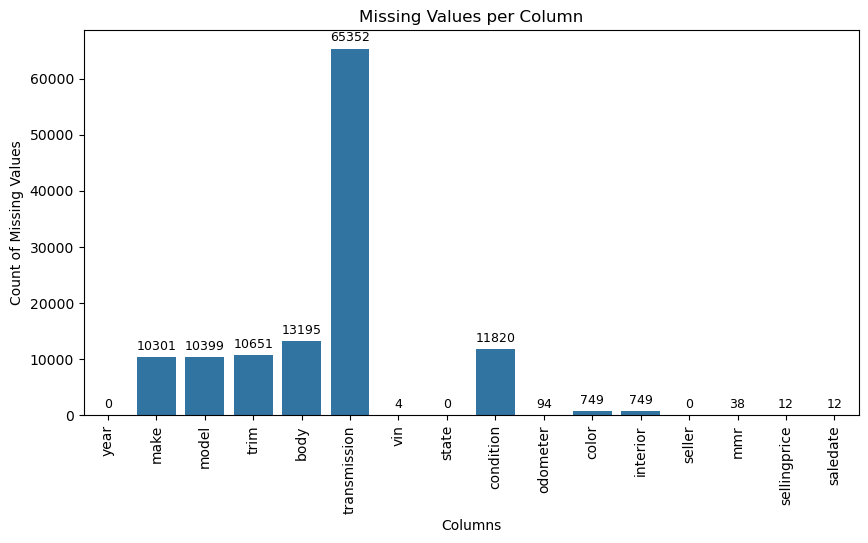

In [9]:
#visualize with a bar chart

missing_counts = carprice_df.isnull().sum()

# Create a bar chart
plt.figure(figsize=(10,5))
ax = sns.barplot(x=missing_counts.index, y=missing_counts.values)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add title and labels
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")

# ✅ Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),   # text = height of bar
        (p.get_x() + p.get_width() / 2., p.get_height()),  # position
        ha='center', va='bottom', fontsize=9, color='black', xytext=(0,3), textcoords='offset points'
    )

plt.show()



In [10]:
# 1. Fill text columns with "Unknown"
text_columns = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior', 'seller']
carprice_df[text_columns] = carprice_df[text_columns].fillna("Unknown")

# 2. Fill numeric columns with median
numeric_columns = ['condition', 'odometer', 'mmr']
for col in numeric_columns:
    carprice_df[col] = carprice_df[col].fillna(carprice_df[col].median())

# 3. Drop rows where 'sellingprice', 'saledate', or 'vin' are missing
carprice_df = carprice_df.dropna(subset=['sellingprice', 'saledate', 'vin'])

# 4. Verify no missing values left
carprice_df.isnull().sum()


year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

# 2. Data frames Queries

#### 2.1 The average, minimum, and maximum car price

In [54]:
print(f"Average Price: {carprice_df['sellingprice'].mean():.2f}")
print(f"Minimum Price: {carprice_df['sellingprice'].min():.0f}")
print(f"Maximum Price: {carprice_df['sellingprice'].max():.0f}")

Average Price: 13611.36
Minimum Price: 1
Maximum Price: 230000


#### 2.2 All unique colors of cars

In [11]:
unique_colors = carprice_df['color'].unique()       # get unique values
unique_colors_sorted = sorted(unique_colors)  # sort alphabetically
unique_colors_sorted


['11034',
 '1167',
 '12655',
 '14872',
 '15719',
 '16633',
 '18384',
 '18561',
 '20627',
 '2172',
 '2846',
 '339',
 '4802',
 '5001',
 '5705',
 '6158',
 '6388',
 '6864',
 '721',
 '9410',
 '9837',
 '9887',
 'Unknown',
 'beige',
 'black',
 'blue',
 'brown',
 'burgundy',
 'charcoal',
 'gold',
 'gray',
 'green',
 'lime',
 'off-white',
 'orange',
 'pink',
 'purple',
 'red',
 'silver',
 'turquoise',
 'white',
 'yellow',
 '—']

In [12]:
#TO LIST ONLY THE VALID COLOR NAMES I HAVE USED THIS FOLLOWING CODE. SO THAT IT WILL ONLY SHOW THE VALID NAMES INSTEAD OF THE NUMBERS.


# List of valid color names (common car colors)
valid_colors = [
    'beige','black','blue','brown','burgundy','charcoal','gold','gray','green',
    'lime','off-white','orange','pink','purple','red','silver','turquoise',
    'white','yellow','Unknown'
]

# Filter dataset to only keep rows where 'color' is valid
carprice_df = carprice_df[carprice_df['color'].isin(valid_colors)]

# Now get unique colors again
unique_colors_cleaned = sorted(carprice_df['color'].unique())
unique_colors_cleaned


['Unknown',
 'beige',
 'black',
 'blue',
 'brown',
 'burgundy',
 'charcoal',
 'gold',
 'gray',
 'green',
 'lime',
 'off-white',
 'orange',
 'pink',
 'purple',
 'red',
 'silver',
 'turquoise',
 'white',
 'yellow']

#### 2.3 number of unique car brands and car models

In [18]:
unique_brands_count = carprice_df['make'].nunique()

unique_models_count = carprice_df['model'].nunique()

print("Number of unique brands:", unique_brands_count)
print("Number of unique models:", unique_models_count)


Number of unique brands: 97
Number of unique models: 974


#### 2.4 Car prices greater than $165000

In [17]:
expensive_cars = carprice_df[carprice_df['sellingprice'] > 165000]

expensive_cars


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
125095,2012,Rolls-Royce,Ghost,Base,Sedan,automatic,sca664s58cux50727,fl,45.0,14316.0,black,beige,braman motorcars,154000.0,169500.0,Wed Jan 14 2015 01:40:00 GMT-0800 (PST)
344905,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9j98eua23833,mo,43.0,27802.0,green,tan,ford-lincoln dealer program,22800.0,230000.0,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
446949,2015,Mercedes-Benz,S-Class,S65 AMG,Sedan,automatic,wddug7kb2fa102347,ca,41.0,5277.0,white,white,mercedes-benz usa,170000.0,173000.0,Thu May 21 2015 05:00:00 GMT-0700 (PDT)
538347,2012,Rolls-Royce,Ghost,Base,sedan,automatic,sca664s59cux50803,ca,44.0,5215.0,white,tan,financial services remarketing (bmw int),166000.0,167000.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
545523,2013,Rolls-Royce,Ghost,Base,sedan,automatic,sca664s52dux52152,fl,42.0,7852.0,white,beige,flag/landrover southpointe,178000.0,171500.0,Wed Jun 17 2015 03:05:00 GMT-0700 (PDT)
548169,2011,Ferrari,458 Italia,Base,coupe,automatic,zff67nfa1b0178698,fl,46.0,12116.0,red,black,platinum motor cars,182000.0,183000.0,Wed Jun 17 2015 03:40:00 GMT-0700 (PDT)
557570,2012,Rolls-Royce,Ghost,EWB,sedan,automatic,sca664l50cux65625,ca,36.0,11832.0,white,black,bentley scottsdale,164000.0,169000.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)


#### 2.5 top 5 most frequently sold car models

In [14]:
top5_models = carprice_df['model'].value_counts().head(5)

print("Top 5 Most Sold Car Models:")
print(top5_models)


Top 5 Most Sold Car Models:
model
Altima    19349
F-150     14479
Fusion    12945
Camry     12545
Escape    11861
Name: count, dtype: int64


#### 2.6 the average selling price of cars by brand

In [10]:
avg_price_by_brand = carprice_df.groupby('make')['sellingprice'].mean().round(2).sort_values(ascending=False)

print("Average Selling Price by Brand (Rounded):")
print(avg_price_by_brand)


Average Selling Price by Brand (Rounded):
make
Rolls-Royce    153488.24
Ferrari        127210.53
Lamborghini    112625.00
Bentley         74367.67
airstream       71000.00
                 ...    
dodge tk          550.00
Geo               528.95
dot               500.00
ford truck        483.33
Daewoo            400.00
Name: sellingprice, Length: 97, dtype: float64


#### 2.7 Minimum selling price of cars for each interior

In [13]:
min_price_by_interior = carprice_df.groupby('interior')['sellingprice'].min().sort_values()

print("Minimum Selling Price by Interior:")
print(min_price_by_interior)


Minimum Selling Price by Interior:
interior
black           1.0
gray            1.0
beige         100.0
green         100.0
tan           100.0
silver        150.0
blue          150.0
—             150.0
burgundy      175.0
red           200.0
brown         200.0
purple        200.0
Unknown       225.0
gold          250.0
white         350.0
off-white     900.0
orange       1200.0
yellow       3100.0
Name: sellingprice, dtype: float64


#### 2.8 Highest odometer reading per year from highest to lowest order

In [12]:
highest_odometer_per_year = carprice_df.groupby('year')['odometer'].max().sort_values(ascending=False)

print("Highest Odometer Reading Per Year:")
print(highest_odometer_per_year)


Highest Odometer Reading Per Year:
year
1997    999999.0
1996    999999.0
2014    999999.0
2013    999999.0
1998    999999.0
1999    999999.0
1993    999999.0
2010    999999.0
2009    999999.0
2012    999999.0
2008    999999.0
2007    999999.0
2005    999999.0
2006    999999.0
2004    999999.0
2003    999999.0
2002    999999.0
2001    999999.0
2011    999999.0
2000    462579.0
1995    396793.0
1992    379307.0
1994    356402.0
1991    274149.0
1986    273327.0
1990    265498.0
1988    241751.0
1987    230946.0
1989    218052.0
1984    170799.0
1985    121644.0
2015    100454.0
1982     85738.0
1983     42697.0
Name: odometer, dtype: float64


#### 2.9 Creating a new column for car age (assuming the current year is 2025)

In [16]:
# Create a new column for car age (current year = 2025)
carprice_df['car_age'] = 2025 - carprice_df['year']

# Display first 5 rows to check
print(carprice_df[['year', 'car_age']].head())


   year  car_age
0  2015       10
1  2015       10
2  2014       11
3  2015       10
4  2014       11


#### 2.10 Number of cars having a condition greater than or equal to 48 and odometer greater than 90000

In [21]:
# Filter cars with condition >= 48 and odometer > 90000
filtered_cars = carprice_df[(carprice_df['condition'] >= 48) & (carprice_df['odometer'] > 90000)]

# Count how many cars meet the condition
count_filtered_cars = filtered_cars.shape[0]

print("Number of cars with condition >= 48 and odometer > 90000:", count_filtered_cars)


Number cars with condition >= 48 and odometer > 90000: 746


#### 2.11 Which state consistently has higher car prices for newer cars (year > 2013)

In [13]:
# Filter newer cars (year > 2013)
newer_cars = carprice_df[carprice_df['year'] > 2013]

# Find average selling price per state
avg_price_by_state = newer_cars.groupby('state')['sellingprice'].mean().round(2).sort_values(ascending=False)

print("Average Selling Price of Newer Cars (year > 2013) by State:")
print(avg_price_by_state)


Average Selling Price of Newer Cars (year > 2013) by State:
state
oh    27507.37
ab    25204.26
nj    23707.79
on    22967.53
qc    22704.40
pa    22042.98
tn    21880.59
mi    21435.97
ca    20900.89
wa    20635.99
co    20501.02
fl    20351.17
ne    20005.96
il    20002.09
ga    19967.43
nv    19824.25
tx    19769.87
ny    19733.00
mo    19575.19
mn    19570.79
la    19171.54
va    19134.97
wi    19088.42
az    18850.34
ut    18849.69
ns    18716.67
hi    18063.16
ma    17733.33
md    17728.18
nc    17356.76
sc    17019.43
or    16464.52
ms    15989.31
in    15585.15
nm    15207.69
pr    15022.41
al    14900.00
ok    10600.00
Name: sellingprice, dtype: float64


#### 2.12 Cars with excellent condition (top 20%), which makes have the lowest average price (value for money)

In [14]:
# Step 1: Find the cutoff for top 20% condition
cutoff = carprice_df['condition'].quantile(0.80)

# Step 2: Filter cars with condition >= cutoff
excellent_cars = carprice_df[carprice_df['condition'] >= cutoff]

# Step 3: Find average price by brand (make), sorted ascending (cheapest first)
value_for_money = excellent_cars.groupby('make')['sellingprice'].mean().round(2).sort_values()

print("Brands with Excellent Cars (Top 20% Condition) and Lowest Average Price:")
print(value_for_money.head(10))   # show top 10 cheapest brands


Brands with Excellent Cars (Top 20% Condition) and Lowest Average Price:
make
Oldsmobile    2100.00
Isuzu         3370.00
honda         4233.33
Saturn        5502.50
chrysler      6033.33
subaru        6200.00
gmc truck     6400.00
smart         6764.13
Pontiac       7487.76
Saab          7645.83
Name: sellingprice, dtype: float64


# 3. Data Visualization and insights:

#### 3.1 The correlation of all the features(columns) having numerical values(e.g. selling price, odometer).

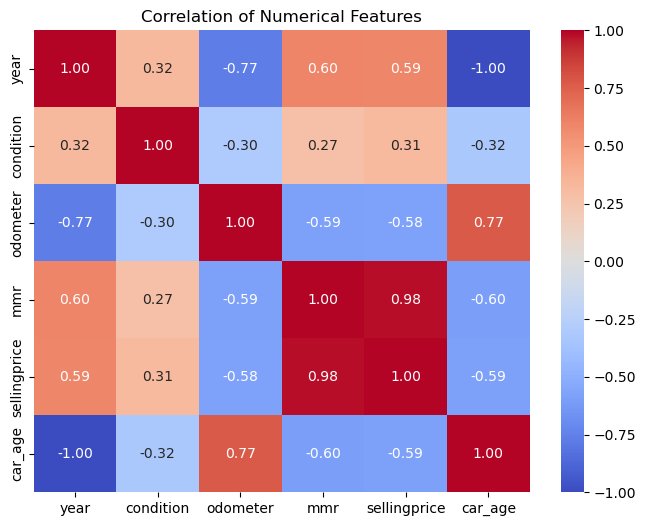

In [17]:
# Select only numeric columns
numeric_cols = carprice_df[['year', 'condition', 'odometer', 'mmr', 'sellingprice', 'car_age']]

# Correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation of Numerical Features")
plt.show()


#### 3.2 Plot a graph to show the average selling price by year and explain the pattern you notice from the graph. (I chose BAR chart)

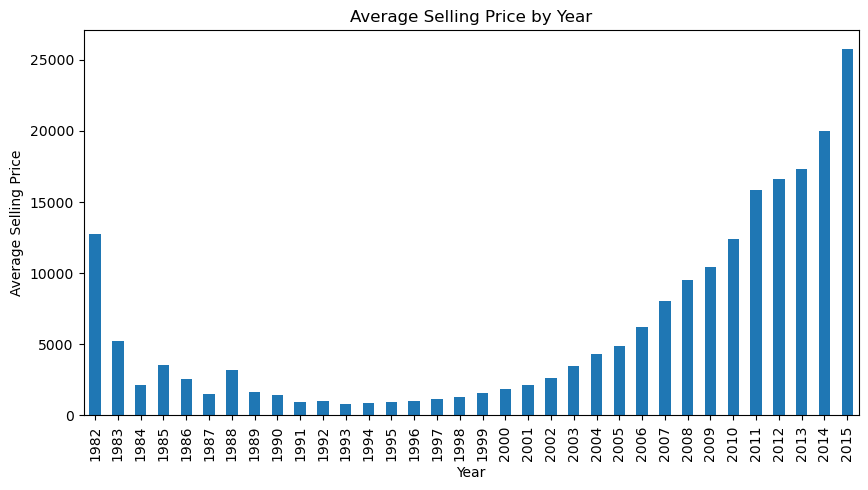

In [22]:
# Group by year and calculate average selling price
avg_price_by_year = carprice_df.groupby('year')['sellingprice'].mean().round(2)

# Plot bar chart
plt.figure(figsize=(10,5))
avg_price_by_year.plot(kind='bar')

plt.title("Average Selling Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Selling Price")
plt.show()


#### 3.3 Plot a graph to show average selling price by odometer and explain the trend you notice from the graph.

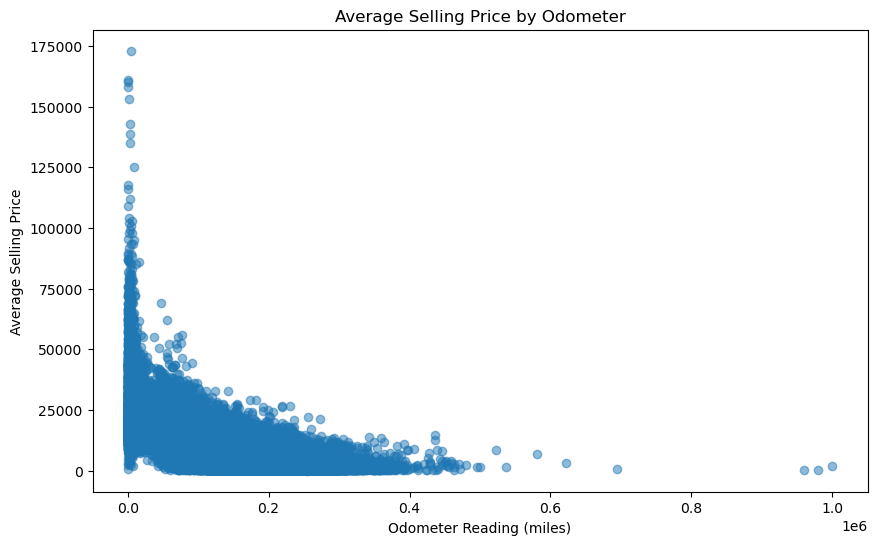

In [21]:
# Group by odometer and calculate average selling price
avg_price_by_odometer = carprice_df.groupby('odometer')['sellingprice'].mean()

# Plot scatter plot
plt.figure(figsize=(10,6))
plt.scatter(avg_price_by_odometer.index, avg_price_by_odometer.values, alpha=0.5)

plt.title("Average Selling Price by Odometer")
plt.xlabel("Odometer Reading (miles)")
plt.ylabel("Average Selling Price")
plt.show()


#### 3.4 Plot a graph to show the number of cars sold in each state. Find the top three highest car selling states by having a look at the graph

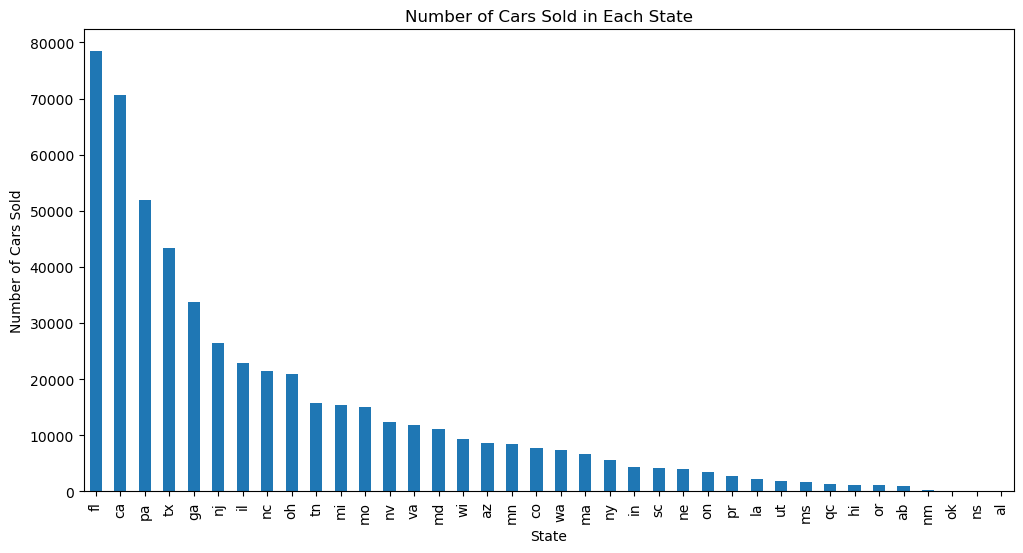

Top 3 States with Highest Car Sales:
state
fl    78410
ca    70553
pa    51948
Name: count, dtype: int64


In [20]:
# Count number of cars sold per state
cars_sold_by_state = carprice_df['state'].value_counts()

# Plot bar chart
plt.figure(figsize=(12,6))
cars_sold_by_state.plot(kind='bar')

plt.title("Number of Cars Sold in Each State")
plt.xlabel("State")
plt.ylabel("Number of Cars Sold")
plt.show()

# Show top 3 states
print("Top 3 States with Highest Car Sales:")
print(cars_sold_by_state.head(3))


#### 3.5 Plot a bar graph of average selling price by condition score ranges of size 5. Give a summary of the insights.

C:\Users\dilee\AppData\Local\Temp\ipykernel_19468\4172429235.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_condition = carprice_df.groupby('condition_range')['sellingprice'].mean().round(2)


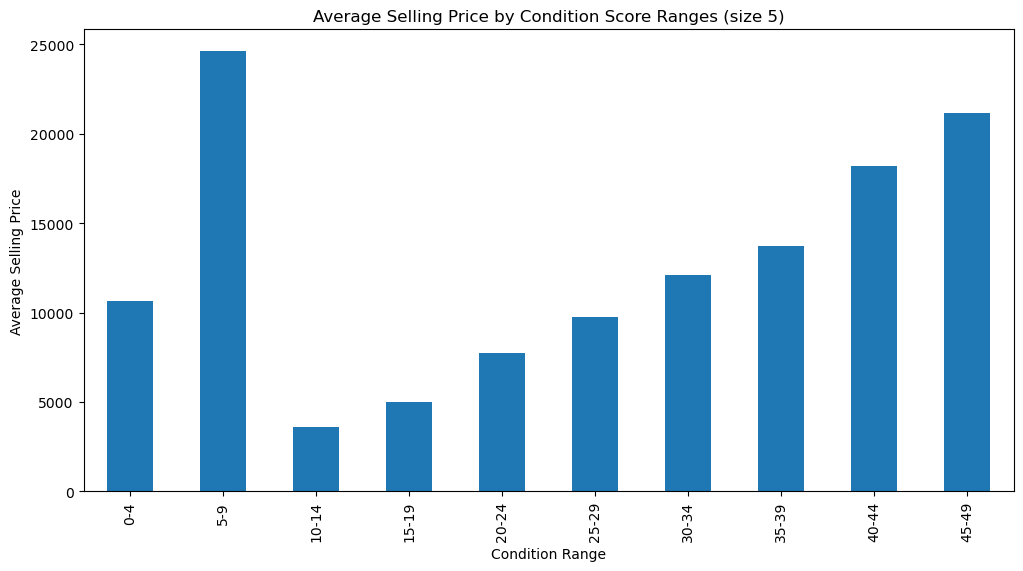

condition_range
0-4      10638.31
5-9      24615.26
10-14     3585.18
15-19     5007.52
20-24     7766.15
25-29     9732.42
30-34    12108.55
35-39    13743.02
40-44    18220.37
45-49    21184.14
Name: sellingprice, dtype: float64


In [23]:
# Step 1: Create bins (ranges of size 5)
bins = range(0, int(carprice_df['condition'].max()) + 5, 5)
labels = [f"{i}-{i+4}" for i in bins[:-1]]

# Step 2: Add a new column for condition ranges
carprice_df['condition_range'] = pd.cut(carprice_df['condition'], bins=bins, labels=labels, right=False)

# Step 3: Calculate average price by condition range
avg_price_by_condition = carprice_df.groupby('condition_range')['sellingprice'].mean().round(2)

# Step 4: Plot bar chart
plt.figure(figsize=(12,6))
avg_price_by_condition.plot(kind='bar')

plt.title("Average Selling Price by Condition Score Ranges (size 5)")
plt.xlabel("Condition Range")
plt.ylabel("Average Selling Price")
plt.show()

# Show the table too
print(avg_price_by_condition)


#### 3.6 Plot a bar graph of no. of cars sold by condition ranges of size 10. Give some insights from the graph.

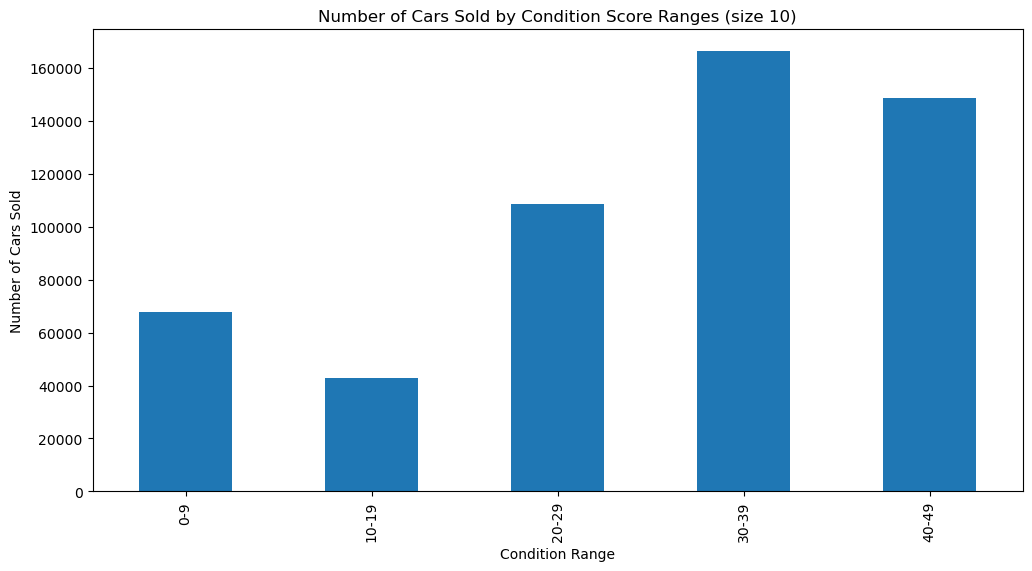

condition_range_10
0-9       67867
10-19     42676
20-29    108537
30-39    166283
40-49    148751
Name: count, dtype: int64


In [24]:
# Step 1: Create bins (ranges of size 10)
bins = range(0, int(carprice_df['condition'].max()) + 10, 10)
labels = [f"{i}-{i+9}" for i in bins[:-1]]

# Step 2: Add new column for condition ranges (size 10)
carprice_df['condition_range_10'] = pd.cut(carprice_df['condition'], bins=bins, labels=labels, right=False)

# Step 3: Count number of cars in each range
cars_count_by_condition = carprice_df['condition_range_10'].value_counts().sort_index()

# Step 4: Plot bar chart
plt.figure(figsize=(12,6))
cars_count_by_condition.plot(kind='bar')

plt.title("Number of Cars Sold by Condition Score Ranges (size 10)")
plt.xlabel("Condition Range")
plt.ylabel("Number of Cars Sold")
plt.show()

# Show table too
print(cars_count_by_condition)


#### 3.7 Plot a box plot to show the distribution of car selling prices grouped by color. Extract insights and if required, remove outliers and plot the graph again.

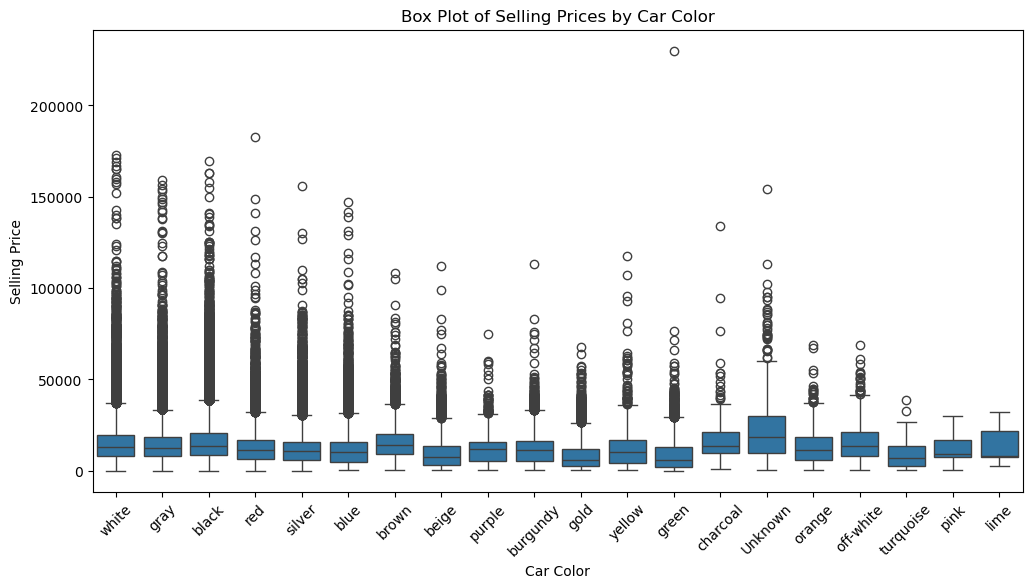

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x='color', y='sellingprice', data=carprice_df)

plt.title("Box Plot of Selling Prices by Car Color")
plt.xlabel("Car Color")
plt.ylabel("Selling Price")
plt.xticks(rotation=45)   # rotate color names for readability
plt.show()
